Fitting 5 folds for each of 810 candidates, totalling 4050 fits


C:\Users\sswar\miniconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1350 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
458 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sswar\miniconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sswar\miniconda3\envs\tf\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\sswar\miniconda3\envs\tf\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9551
Precision: 0.9792
Recall: 0.9400
F1 Score: 0.9592


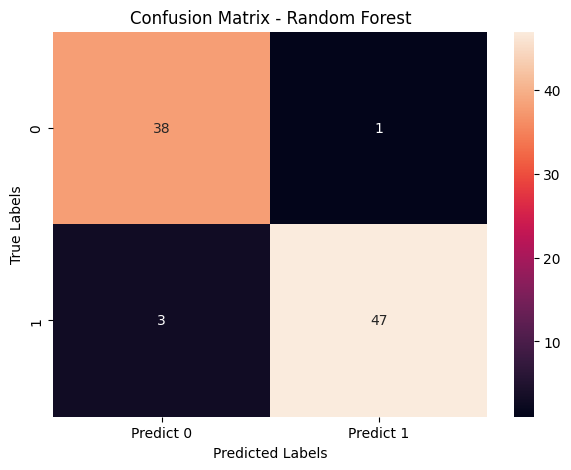

TP = 47
TN = 38
FN = 3
FP = 1
ACCURACY of model is: 95.51%
SENSITIVITY of the model is: 94.00%
SPECIFICITY of the model is: 97.44%
FALSE POSITIVE RATE of the model is: 2.56%
PRECISION of the model is: 97.92%
Classification Report - Random Forest
              precision    recall  f1-score   support

           1       0.98      0.94      0.96        50
           0       0.93      0.97      0.95        39

    accuracy                           0.96        89
   macro avg       0.95      0.96      0.95        89
weighted avg       0.96      0.96      0.96        89

Model saved as 'random_forest_model.pkl'


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
import joblib  # Import joblib for saving the model

# Load the dataset
data_path = 'Data - Parkinsons.csv'
pdata = pd.read_csv(data_path)

# Data preprocessing
pdata = pdata.drop(['name'], axis=1)  # Drop non-numeric or unnecessary columns
X = pdata.drop(['status'], axis=1)
y = pdata[['status']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X_resampled, y_resampled.values.ravel())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.30, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train.values.ravel())

# Get best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the best model
best_rf = grid_search.best_estimator_
y_predicted_rf = best_rf.predict(X_test)

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_predicted_rf)
precision = precision_score(y_test, y_predicted_rf)
recall = recall_score(y_test, y_predicted_rf)
f1 = f1_score(y_test, y_predicted_rf)
conf_matrix = confusion_matrix(y_test, y_predicted_rf)

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the confusion matrix
df_cm_rf = pd.DataFrame(conf_matrix, index=['0', '1'], columns=['Predict 0', 'Predict 1'])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm_rf, annot=True, fmt='g')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Additional metrics
TN, FP, FN, TP = conf_matrix.ravel()
print("TP =", TP)
print("TN =", TN)
print("FN =", FN)
print("FP =", FP)
print(f'ACCURACY of model is: {(TP + TN) / float(TP + TN + FN + FP) * 100:.2f}%')
print(f'SENSITIVITY of the model is: {TP / float(TP + FN) * 100:.2f}%')
print(f'SPECIFICITY of the model is: {TN / float(TN + FP) * 100:.2f}%')
print(f'FALSE POSITIVE RATE of the model is: {FP / float(TN + FP) * 100:.2f}%')
print(f'PRECISION of the model is: {TP / float(TP + FP) * 100:.2f}%')
print("Classification Report - Random Forest")
print(classification_report(y_test, y_predicted_rf, labels=[1, 0]))

# Save the model
joblib.dump(best_rf, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")
